In [1]:
# 3.	Import the required packages with their customary aliases as follows:
#     `import pandas as pd`   
#     `import numpy as np`  
#     `import matplotlib.pyplot as plt`  
#     `import seaborn as sns`
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a
# look at the first few and last few rows to familiarize yourself with what is contained in this dataset.
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')

In [3]:
# 5. How many rows and columns are in `gdp_df`? What are the data types of each column?
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   Value            8219 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 257.0+ KB


In [4]:
gdp_df.describe()

,Year,Value,Value Footnotes
count,8219.000000,8219.000000,0.0
mean,2006.672345,20270.976242,NaN
std,9.782986,22532.004246,NaN
min,1990.000000,510.822823,NaN
25%,1998.000000,4284.868430,NaN
50%,2007.000000,11916.457927,NaN
75%,2015.000000,28543.305542,NaN
max,2023.000000,174339.077325,NaN


gdp_df // gdp_df_droppedVF // gdp_df_clean

In [5]:
# 6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.
gdp_df_droppedVF = gdp_df.drop(columns=['Value Footnotes'])

In [6]:
print(gdp_df_droppedVF.columns)

Index(['Country or Area', 'Year', 'Value'], dtype='object')


In [7]:
gdp_df_clean = gdp_df_droppedVF.rename(columns={
    gdp_df.columns[0]: "Country",
    gdp_df.columns[1]: "Year",
    gdp_df.columns[2]: "GDP_Per_Capita"})

In [8]:
gdp_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         8219 non-null   object 
 1   Year            8219 non-null   int64  
 2   GDP_Per_Capita  8219 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 192.8+ KB


In [9]:
# 7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of 
# observations per year. What do you notice? 
country_counts = gdp_df_clean.groupby("Country")["Year"].count()
print(country_counts.sort_values())

Country
Djibouti                     11
Turks and Caicos Islands     13
Sint Maarten (Dutch part)    15
Faroe Islands                16
Kosovo                       16
                             ..
Viet Nam                     34
Vanuatu                      34
World                        34
Zambia                       34
Zimbabwe                     34
Name: Year, Length: 247, dtype: int64


In [10]:
max_years = gdp_df_clean["Year"].nunique()
print("Total unique years in dataset:", max_years)

Total unique years in dataset: 34


In [11]:
year_counts = gdp_df_clean.groupby("Year")["Country"].count()
print(year_counts.sort_index())

Year
1990    233
1991    234
1992    234
1993    234
1994    235
1995    236
1996    236
1997    238
1998    238
1999    238
2000    240
2001    240
2002    241
2003    241
2004    241
2005    241
2006    242
2007    242
2008    244
2009    245
2010    245
2011    246
2012    246
2013    247
2014    247
2015    247
2016    247
2017    247
2018    247
2019    247
2020    247
2021    247
2022    246
2023    240
Name: Country, dtype: int64


In [12]:
# Count how many years each country has
country_counts = gdp_df_clean.groupby("Country")["Year"].nunique()

# Find the max number of years in the dataset
max_years = gdp_df_clean["Year"].nunique()

# Filter countries that have data for all years
complete_countries = country_counts[country_counts == max_years]
print("Number of countries with full coverage:", complete_countries.shape[0])
print(complete_countries.index.tolist())

Number of countries with full coverage: 228
['Africa Eastern and Southern', 'Africa Western and Central', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Arab World', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Caribbean small states', 'Central African Republic', 'Central Europe and the Baltics', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cyprus', 'Czechia', "CÃ´te d'Ivoire", 'Dem. Rep. Congo', 'Denmark', 'Dominica', 'Dominican Republic', 'Early-demographic dividend', 'East Asia & Pacific', 'East Asia & Pacific (IDA & IBRD)', 'East Asia & Pacific (excluding high income)', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia

#### 228 total teams

In [13]:
country_years = gdp_df_clean.groupby("Country")["Year"].nunique()

In [14]:
max_years = gdp_df_clean["Year"].nunique()
print("Total unique years in dataset:", max_years)

Total unique years in dataset: 34


In [15]:
complete_countries = country_years[country_years == max_years]
print("Number of countries with full coverage:", complete_countries.shape[0])
print("Countries:", complete_countries.index.tolist())

Number of countries with full coverage: 228
Countries: ['Africa Eastern and Southern', 'Africa Western and Central', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Arab World', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Caribbean small states', 'Central African Republic', 'Central Europe and the Baltics', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cyprus', 'Czechia', "CÃ´te d'Ivoire", 'Dem. Rep. Congo', 'Denmark', 'Dominica', 'Dominican Republic', 'Early-demographic dividend', 'East Asia & Pacific', 'East Asia & Pacific (IDA & IBRD)', 'East Asia & Pacific (excluding high income)', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Estonia', 'Eswatini'

In [16]:
# 8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to 
# the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution
# section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How
# do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?
gdp_2020 = gdp_df_clean[gdp_df_clean['Year'] == 2020]

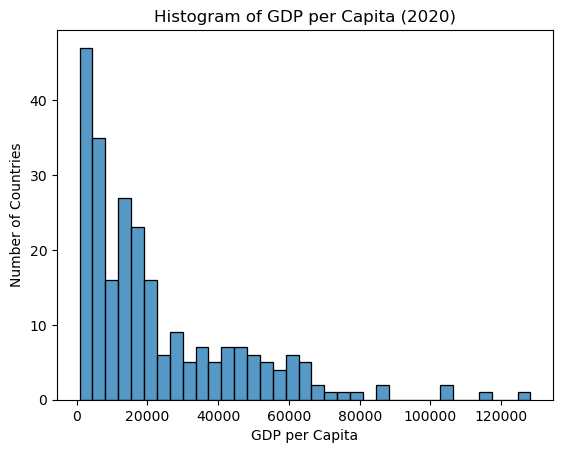

In [17]:
sns.histplot(gdp_2020['GDP_Per_Capita'], bins=35, kde=False)
plt.title("Histogram of GDP per Capita (2020)")
plt.xlabel("GDP per Capita")
plt.ylabel("Number of Countries")
plt.show()

This stacks the number of countries per bar, with each bar being divided by GDP per Capita

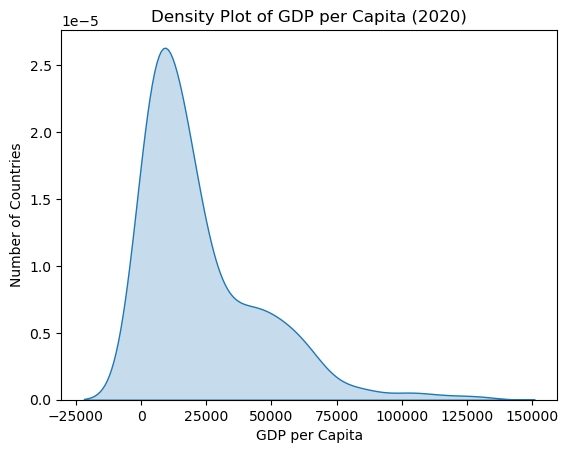

In [18]:
sns.kdeplot(gdp_2020['GDP_Per_Capita'], fill=True)
plt.title("Density Plot of GDP per Capita (2020)")
plt.xlabel("GDP per Capita")
plt.ylabel("Number of Countries")
plt.show()

Without stacking things into bars, the Density chart gathers data in a similur fashion to the Histogram above

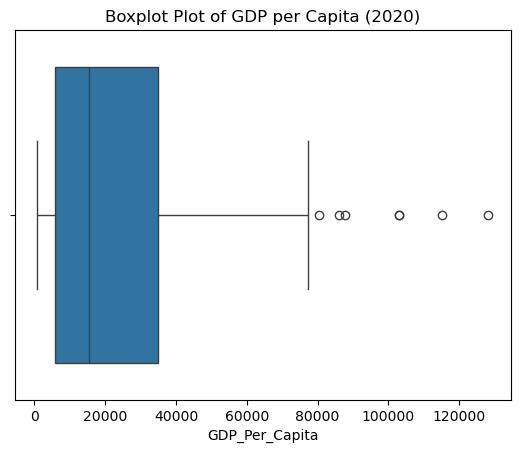

In [19]:
sns.boxplot(x=gdp_2020['GDP_Per_Capita'])
plt.title("Boxplot Plot of GDP per Capita (2020)")
plt.show()

The low median line shows us that most countries have a lower GDP per Capita, the circles outside of the whiskers are outliers,
this visualization shows us that most of the worlds GDP is clustered with a handful of outliers standing far apart.

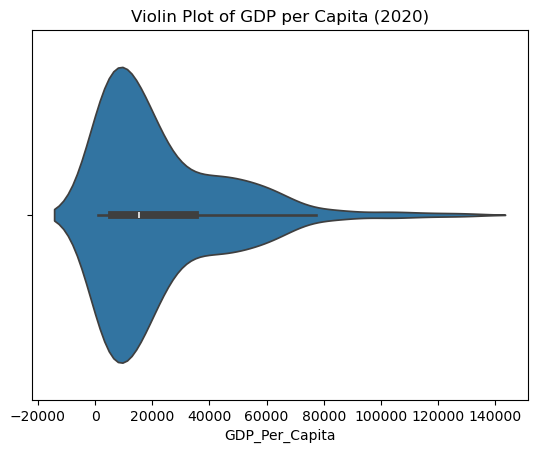

In [20]:
sns.violinplot(x=gdp_2020['GDP_Per_Capita'])
plt.title("Violin Plot of GDP per Capita (2020)")
plt.show()

The Violin Chart has elements of a box chart (white line = median, range of values =  black inner box) and a density chart (the
shape on the outside) th wider the section = the more countries belong to it, showing the clusters and outliers, the box inside represents the median 50% of countries on this list (interquartile range).
When compared to the boxplot, the violin plot gives you extra detail about the distribution’s shape, not just the summary stats.

In [21]:
# 9. What was the median GDP per capita value in 2020?
median_gdp_2020 = gdp_2020["GDP_Per_Capita"].median()
print("Median GDP per capita in 2020:", median_gdp_2020)

Median GDP per capita in 2020: 15309.23598817024


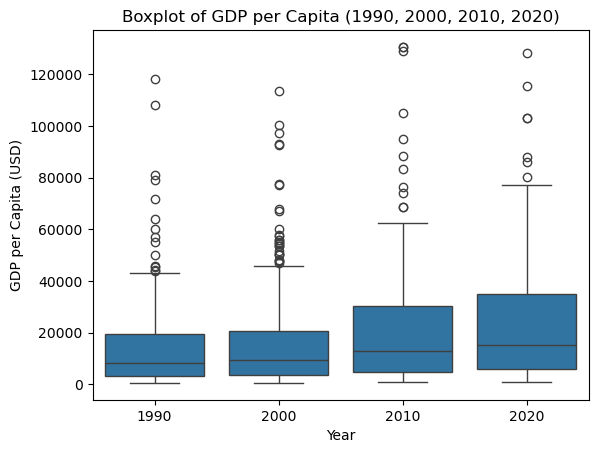

In [22]:
# 10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000,
# 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this,
# create the following 4 plots:
# 	* A boxplot
# 	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
# 	* A scatterplot
# 	* A scatterplot with a trend line overlaid (see this regplot example:
# https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
# Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

# for the years
gdp_decades = gdp_df_clean[gdp_df_clean["Year"].isin([1990, 2000, 2010, 2020])]
# Boxplot
sns.boxplot(x="Year", y="GDP_Per_Capita", data=gdp_decades)
plt.title("Boxplot of GDP per Capita (1990, 2000, 2010, 2020)")
plt.ylabel("GDP per Capita (USD)")
plt.show()

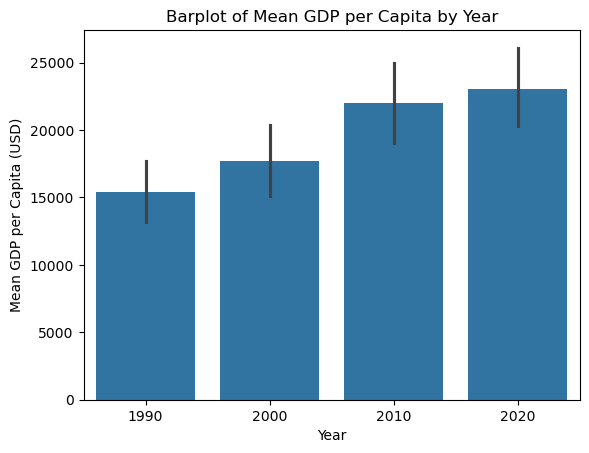

In [23]:
# Barplot
sns.barplot(x="Year", y="GDP_Per_Capita", data=gdp_decades, estimator=np.mean)
plt.title("Barplot of Mean GDP per Capita by Year")
plt.ylabel("Mean GDP per Capita (USD)")
plt.show()

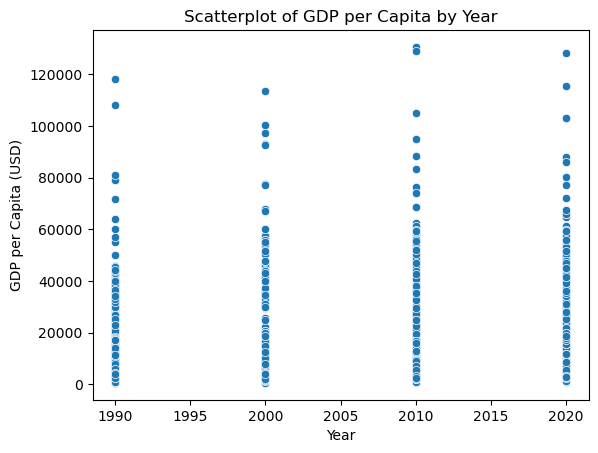

In [24]:
# Scatterplot
sns.scatterplot(x="Year", y="GDP_Per_Capita", data=gdp_decades)
plt.title("Scatterplot of GDP per Capita by Year")
plt.ylabel("GDP per Capita (USD)")
plt.show()

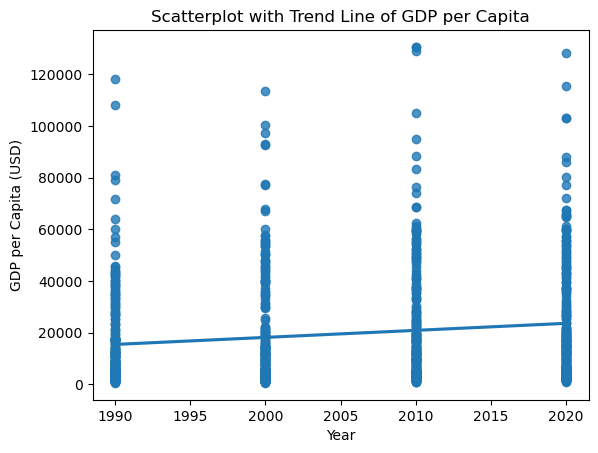

In [25]:
# Scatterplot with Trendline
sns.regplot(x="Year", y="GDP_Per_Capita", data=gdp_decades, scatter=True, ci=None)
plt.title("Scatterplot with Trend Line of GDP per Capita")
plt.ylabel("GDP per Capita (USD)")
plt.show()

In [26]:
# 11. Which country was the first to have a GDP per capita greater than $100,000?

# Step 1: Filter rows where GDP per capita > 100,000
high_gdp = gdp_df_clean[gdp_df_clean["GDP_Per_Capita"] > 100000]

# Step 2: Sort by Year (earliest first), then by GDP value if you want
high_gdp_sorted = high_gdp.sort_values(by=["Year", "GDP_Per_Capita"])

# Step 3: Look at the first row
first_country = high_gdp_sorted.iloc[0]
print("First country to exceed $100,000 GDP per capita:")
print(first_country["Country"], first_country["Year"], first_country["GDP_Per_Capita"])

First country to exceed $100,000 GDP per capita:
United Arab Emirates 1990 108057.04246381248


Country with highest GDP per capita in 2020: Luxembourg
GDP per capita: 128256.5603407562


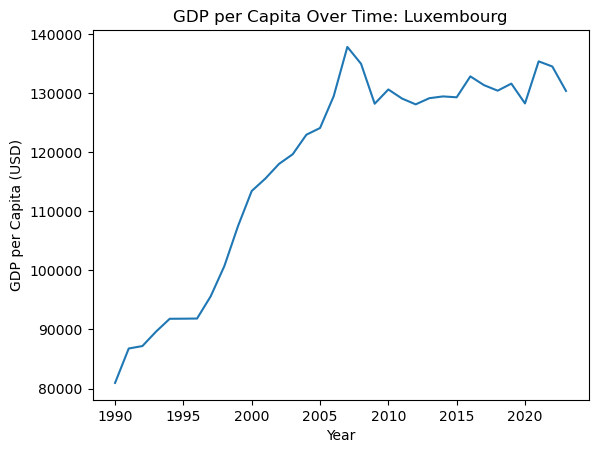

In [27]:
# 12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita
# has changed over the timespan of the dataset.

# Filter for 2020
gdp_2020 = gdp_df_clean[gdp_df_clean["Year"] == 2020]

# Find the country with the maximum GDP per capita
max_country_row = gdp_2020.loc[gdp_2020["GDP_Per_Capita"].idxmax()]
print("Country with highest GDP per capita in 2020:", max_country_row["Country"])
print("GDP per capita:", max_country_row["GDP_Per_Capita"])

# Subset the full dataset for that country
country_name = max_country_row["Country"]
country_data = gdp_df_clean[gdp_df_clean["Country"] == country_name]

sns.lineplot(x="Year", y="GDP_Per_Capita", data=country_data)
plt.title(f"GDP per Capita Over Time: {country_name}")
plt.ylabel("GDP per Capita (USD)")
plt.xlabel("Year")
plt.show()

Country with lowest GDP per capita in 2020: Burundi
GDP per capita: 833.9202574580189


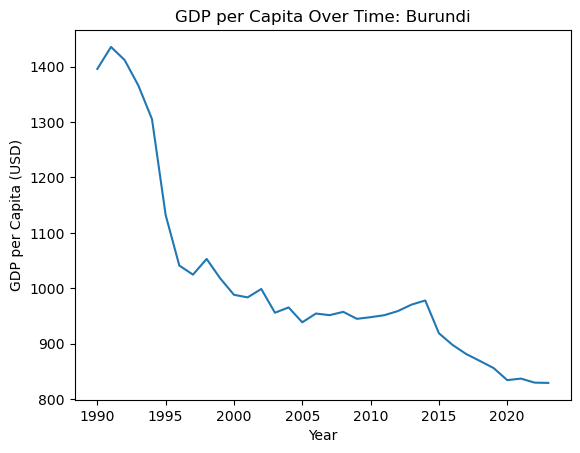

In [28]:
# 13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has
# changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP 
# per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

# Filter for 2020
gdp_2020 = gdp_df_clean[gdp_df_clean["Year"] == 2020]

# Find the country with the minimum GDP per capita
min_country_row = gdp_2020.loc[gdp_2020["GDP_Per_Capita"].idxmin()]
print("Country with lowest GDP per capita in 2020:", min_country_row["Country"])
print("GDP per capita:", min_country_row["GDP_Per_Capita"])

# Subset the full dataset for that country
country_name = min_country_row["Country"]
country_data = gdp_df_clean[gdp_df_clean["Country"] == country_name]

# Plot GDP per capita trend
sns.lineplot(x="Year", y="GDP_Per_Capita", data=country_data)
plt.title(f"GDP per Capita Over Time: {country_name}")
plt.ylabel("GDP per Capita (USD)")
plt.xlabel("Year")
plt.show()

In [29]:
# Filter for 1990 and 2020
gdp_1990 = gdp_df_clean[gdp_df_clean["Year"] == 1990][["Country", "GDP_Per_Capita"]]
gdp_2020 = gdp_df_clean[gdp_df_clean["Year"] == 2020][["Country", "GDP_Per_Capita"]]

# Merge on Country
compare = gdp_1990.merge(gdp_2020, on="Country", suffixes=("_1990", "_2020"))

# Find countries where 2020 GDP per capita is lower than 1990
lower_in_2020 = compare[compare["GDP_Per_Capita_2020"] < compare["GDP_Per_Capita_1990"]]

print("Countries with lower GDP per capita in 2020 than in 1990:")
print(lower_in_2020[["Country", "GDP_Per_Capita_1990", "GDP_Per_Capita_2020"]])

Countries with lower GDP per capita in 2020 than in 1990:
                                      Country  GDP_Per_Capita_1990  \
10                                      Aruba         34579.220640   
16                                   Barbados         16976.761648   
27                                     Brunei        118163.683198   
30                                    Burundi          1396.077627   
37                   Central African Republic          1481.252551   
44                                      Congo          8699.526839   
49                            Dem. Rep. Congo          2172.001597   
71   Fragile and conflict affected situations          6062.707946   
73                                      Gabon         23884.810700   
84                                      Haiti          3946.365646   
111                           Kyrgyz Republic          6095.681086   
121                                   Liberia          1866.405481   
122                             

In [30]:
# 14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing 
# this. Check the arguments for the read_csv function to find ones that can help correct the errors
# (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a
# look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of
# the columns.
import os
print(os.getcwd())

C:\Users\matth\OneDrive\Documents\NSS\python\da16-python-gdp-and-internet-use-analysis-MatthewRitchey\notebooks


In [31]:
import os
print(os.listdir(".."))          # shows what's next to notebooks
print(os.listdir("../data"))     # shows files inside data

['.git', '.gitignore', '.ipynb_checkpoints', 'data', 'notebooks', 'README.md', 'Untitled.ipynb']
['gdp_per_capita.csv', 'internet.csv']


In [ ]:
internet_df = pd.read_csv("../data/internet.csv")
print(internet_df.head())
print(internet_df.info()) # didn't work

In [ ]:
with open("../data/internet.csv") as f:
    for i, line in enumerate(f):
        if i == 6377:  # Python counts from 0, so line 6378 is index 6377
            print(line) #didn't work

In [32]:
internet_df = pd.read_csv("../data/internet.csv", on_bad_lines="skip")

In [33]:
print(internet_df.head())
print(internet_df.info())

  Country or Area  Year  Value Value Footnotes
0     Afghanistan  2019  17.60               1
1     Afghanistan  2018  16.80               2
2     Afghanistan  2017  13.50               3
3     Afghanistan  2016  11.00               4
4     Afghanistan  2015   8.26               4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6380 entries, 0 to 6379
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6380 non-null   object 
 1   Year             6380 non-null   object 
 2   Value            6083 non-null   float64
 3   Value Footnotes  2826 non-null   object 
dtypes: float64(1), object(3)
memory usage: 199.5+ KB
None


In [55]:
# 15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

# Drop "Value Footnotes" column
internet_df_drop_vf = internet_df.drop(columns=["Value Footnotes"])

# Rename remaining columns
internet_df_clean = internet_df_drop_vf.rename(columns={
    "Country or Area": "Country",
    "Year": "Year",
    "Value": "Internet_Users_Pct"
})

print(internet_df_clean.head())
print(internet_df_clean.info())

       Country    Year  Internet_Users_Pct
0  Afghanistan  2019.0               17.60
1  Afghanistan  2018.0               16.80
2  Afghanistan  2017.0               13.50
3  Afghanistan  2016.0               11.00
4  Afghanistan  2015.0                8.26
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6380 entries, 0 to 6379
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             6380 non-null   object 
 1   Year                6086 non-null   float64
 2   Internet_Users_Pct  6083 non-null   float64
dtypes: float64(2), object(1)
memory usage: 149.7+ KB
None


In [56]:
# 16. Look at the number of observations in this dataset per year. What do you notice?
year_counts = internet_df_clean["Year"].value_counts().sort_index()
print(year_counts)

Year
0.83         1
0.84         1
0.98         1
1990.00    226
1991.00     39
1992.00     50
1993.00     66
1994.00     92
1995.00    141
1996.00    177
1997.00    188
1998.00    195
1999.00    207
2000.00    210
2001.00    212
2002.00    214
2003.00    208
2004.00    210
2005.00    212
2006.00    212
2007.00    217
2008.00    214
2009.00    214
2010.00    209
2011.00    214
2012.00    209
2013.00    203
2014.00    204
2015.00    203
2016.00    206
2017.00    205
2018.00    174
2019.00    185
2020.00    186
2021.00    186
2022.00    184
2023.00     11
Name: count, dtype: int64


In [57]:
# Convert to numeric, invalid entries become NaN
internet_df["Year"] = pd.to_numeric(internet_df["Year"], errors="coerce")

# Keep only rows where Year is between 1980 and 2025
internet_df_clean = internet_df_clean[
    (internet_df_clean["Year"].notna()) & 
    (internet_df_clean["Year"].between(1980, 2025))]

internet_df_clean["Year"] = internet_df_clean["Year"].astype("Int64")

print(internet_df_clean["Year"].unique()[:20])
print(internet_df_clean["Year"].dtype)


<IntegerArray>
[2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007,
 2006, 2005, 2004, 2003, 2002, 2001, 1990]
Length: 20, dtype: Int64
Int64


In [ ]:
# converting the year column to numeric
internet_df_clean["Year"] = pd.to_numeric(internet_df["Year"], errors="coerce")

# Drop rows where Year is NaN
internet_df_clean = internet_df_clean.dropna(subset=["Year"])

# show results
year_counts = internet_df_clean["Year"].value_counts().sort_index()
print(year_counts)



# this didn't work

In [ ]:
# Convert to numeric first
internet_df_clean["Year"] = pd.to_numeric(internet_df_clean["Year"], errors="coerce")

# Drop rows with NaN years
internet_df_clean = internet_df_clean.dropna(subset=["Year"])

# Cast safely to Int64
internet_df_clean["Year"] = internet_df_clean["Year"].astype("Int64")



# this didn't work

In [58]:
# creating the results in a table format
year_counts = internet_df_clean["Year"].value_counts().sort_index()
print(year_counts)

Year
1990    226
1991     39
1992     50
1993     66
1994     92
1995    141
1996    177
1997    188
1998    195
1999    207
2000    210
2001    212
2002    214
2003    208
2004    210
2005    212
2006    212
2007    217
2008    214
2009    214
2010    209
2011    214
2012    209
2013    203
2014    204
2015    203
2016    206
2017    205
2018    174
2019    185
2020    186
2021    186
2022    184
2023     11
Name: count, dtype: Int64


In [59]:
print(internet_df_clean.columns)

Index(['Country', 'Year', 'Internet_Users_Pct'], dtype='object')


In [60]:
# 17. What is the first year to have a non-zero internet users percentage value?

# Find the first year with non-zero internet usage
first_nonzero_year = internet_df_clean.loc[
    internet_df_clean["Internet_Users_Pct"] > 0, "Year"
].min()

print("The first year with non-zero internet users percentage is:", first_nonzero_year)

The first year with non-zero internet users percentage is: 1990


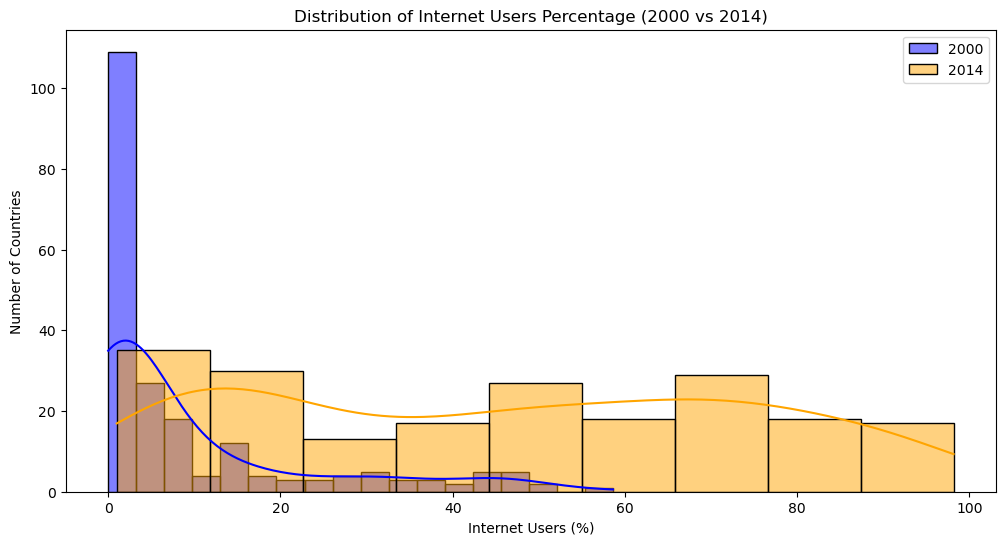

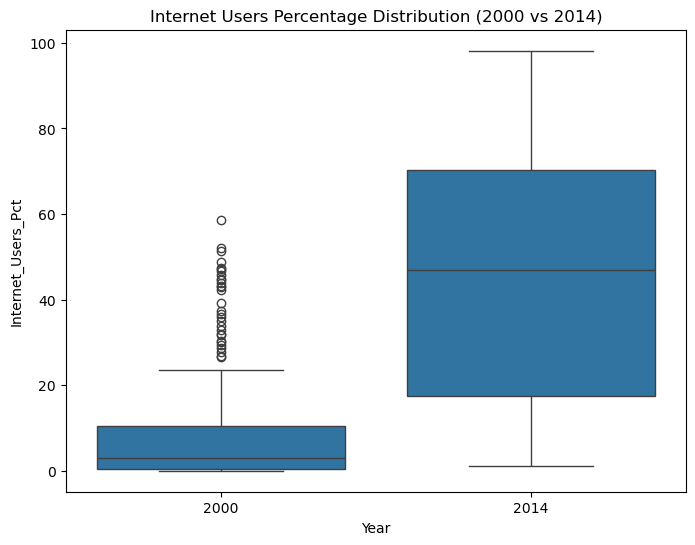

C:\Users\matth\AppData\Local\Temp\ipykernel_31972\459718601.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=subset_df, x="Year", y="Internet_Users_Pct", palette="Set2")


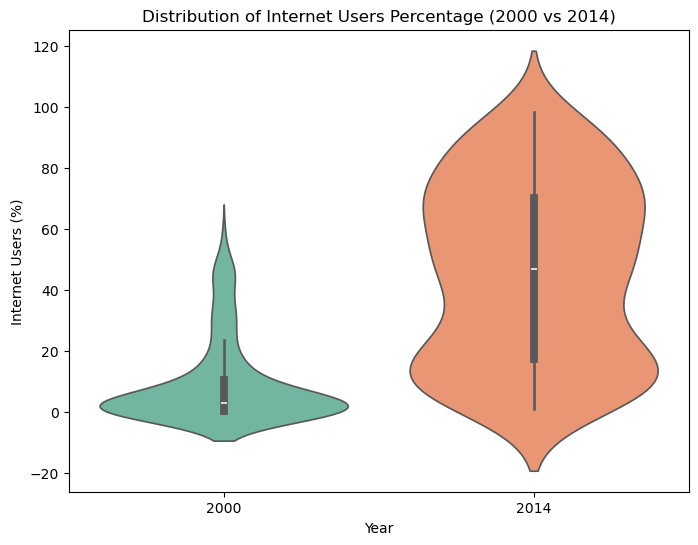

In [62]:
# 18. How does the distribution of internet users percent differ for 2000 and 2014?

# create a subset for 2000 and 2014
internet_2000 = internet_df_clean[internet_df_clean["Year"] == 2000]
internet_2014 = internet_df_clean[internet_df_clean["Year"] == 2014]
subset_df = internet_df_clean[internet_df_clean["Year"].isin([2000, 2014])]

# Plot size
plt.figure(figsize=(12,6))

# Histogram comparison
sns.histplot(internet_2000["Internet_Users_Pct"], color="blue", label="2000", kde=True)
sns.histplot(internet_2014["Internet_Users_Pct"], color="orange", label="2014", kde=True)

plt.title("Distribution of Internet Users Percentage (2000 vs 2014)")
plt.xlabel("Internet Users (%)")
plt.ylabel("Number of Countries")
plt.legend()
plt.show()

# Boxplot comparison
plt.figure(figsize=(8,6))
sns.boxplot(data=internet_df_clean[internet_df_clean["Year"].isin([2000,2014])],
            x="Year", y="Internet_Users_Pct")
plt.title("Internet Users Percentage Distribution (2000 vs 2014)")
plt.show()

# Violin Plot comparison
plt.figure(figsize=(8,6))
sns.violinplot(data=subset_df, x="Year", y="Internet_Users_Pct", palette="Set2")

plt.title("Distribution of Internet Users Percentage (2000 vs 2014)")
plt.xlabel("Year")
plt.ylabel("Internet Users (%)")
plt.show()

It seams that internet usage was quite low in 2000, while there were a lot of outliers, most of the countries seemed to be well below 10%.
2014 seems to have a much wider set of data and no major outliers, with a median line near 50%.

In [63]:
# 19. For how many countries was the percentage of internet users below 5% in 2014

# created a new filter for the year 2014
internet_2014 = internet_df_clean[internet_df_clean["Year"] == 2014]
# new filter for low internet in 2014 with less tham 5% usage
low_internet_2014 = internet_2014[internet_2014["Internet_Users_Pct"] < 5]
# new filter for counting unique countries
num_countries =low_internet_2014["Country"].nunique()
print(low_internet_2014["Country"].unique())
print("Number of countries with <5% internet users in 2014:", num_countries)

['Burundi' 'Central African Republic' 'Chad'
 'Democratic Republic of the Congo' 'Eritrea' 'Guinea-Bissau' 'Madagascar'
 'Niger' 'Somalia' 'South Sudan']
Number of countries with <5% internet users in 2014: 10


In [64]:
# 20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames.
# Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged
# correctly.
# view data from each column
print(gdp_df_clean.head())
print(internet_df_clean.head())

       Country  Year  GDP_Per_Capita
0  Afghanistan  2023     1992.424394
1  Afghanistan  2022     1981.710168
2  Afghanistan  2021     2144.166570
3  Afghanistan  2020     2769.685745
4  Afghanistan  2019     2927.245144
       Country  Year  Internet_Users_Pct
0  Afghanistan  2019               17.60
1  Afghanistan  2018               16.80
2  Afghanistan  2017               13.50
3  Afghanistan  2016               11.00
4  Afghanistan  2015                8.26


In [65]:
# conduct the merge
gdp_and_internet_use = pd.merge(
    gdp_df_clean,
    internet_df_clean,
    on=["Country", "Year"], # matching columns
    how="outer") # type of join

# inspect final results
print(gdp_and_internet_use.head())
print(gdp_and_internet_use.tail())
print(gdp_and_internet_use.info())

       Country  Year  GDP_Per_Capita  Internet_Users_Pct
0  Afghanistan  1990             NaN            0.000000
1  Afghanistan  2000     1617.826475                 NaN
2  Afghanistan  2001     1454.110782            0.004723
3  Afghanistan  2002     1774.308743            0.004561
4  Afghanistan  2003     1815.928200            0.087891
       Country  Year  GDP_Per_Capita  Internet_Users_Pct
9494  Zimbabwe  2019     3294.806084             26.5883
9495  Zimbabwe  2020     2987.269823             29.2986
9496  Zimbabwe  2021     3184.785451             32.4616
9497  Zimbabwe  2022     3323.121932             32.5615
9498  Zimbabwe  2023     3442.251327                 NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9499 entries, 0 to 9498
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             9499 non-null   object 
 1   Year                9499 non-null   Int64  
 2   GDP_Per_C

In [67]:
# Check how many rows have both GDP and Internet data
print(gdp_and_internet_use[["GDP_Per_Capita","Internet_Users_Pct"]].notna().sum())

GDP_Per_Capita        8219
Internet_Users_Pct    6083
dtype: int64


In [68]:
# spot checking the data to see how the merge looks on a country
print(gdp_and_internet_use[gdp_and_internet_use["Country"]=="United States"].head(10))

            Country  Year  GDP_Per_Capita  Internet_Users_Pct
9045  United States  1990    44378.524027            0.784729
9046  United States  1991    43742.026118            1.163190
9047  United States  1992    44659.151463            1.724200
9048  United States  1993    45286.935508            2.271670
9049  United States  1994    46537.357146            4.862780
9050  United States  1995    47220.957961            9.237090
9051  United States  1996    48435.700102           16.419400
9052  United States  1997    49984.269650           21.616400
9053  United States  1998    51619.869834           30.093200
9054  United States  1999    53474.045430           35.848700


Top 3 countries in 2014: ['Iceland', 'Falkland (Malvinas) Islands', 'Bermuda']


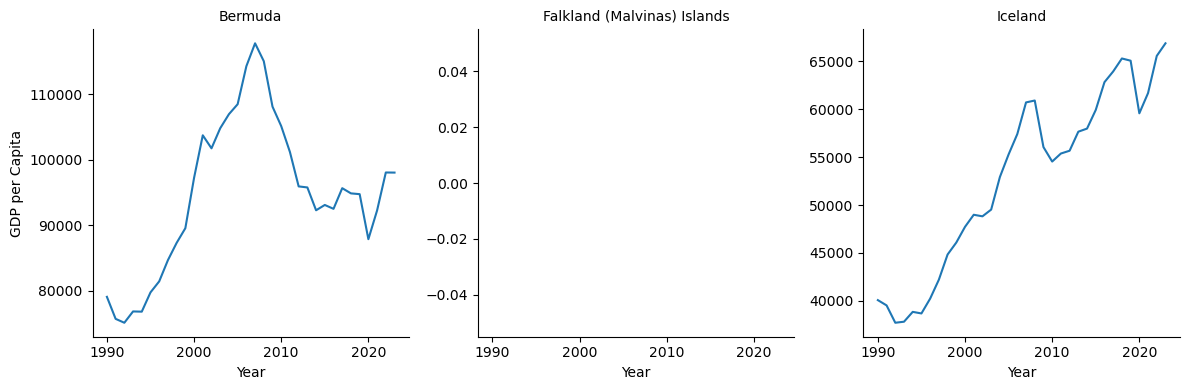

In [69]:
# 21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid
# (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed
# over time for these three countries. What do you notice?

# find the top 3 countries for internet usage
top3_countries = internet_2014.nlargest(3, "Internet_Users_Pct")["Country"].tolist()
print("Top 3 countries in 2014:", top3_countries)

# subset the data for the top 3 countries
subset_top3 = gdp_and_internet_use[gdp_and_internet_use["Country"].isin(top3_countries)]

# create the seaborn facetgrid chart
g = sns.FacetGrid(subset_top3, col="Country", col_wrap=3, sharey=False, height=4)
g.map_dataframe(sns.lineplot, x="Year", y="GDP_Per_Capita")
g.set_axis_labels("Year", "GDP per Capita")
g.set_titles("{col_name}")
plt.show()

All of the top 3 are relatively small countries, each with ow GDP's with Falkand having either an unreported
or an unknown level.

                          Country  Internet_Users_Pct
2592                      Iceland             98.1580
1893  Falkland (Malvinas) Islands             97.6000
602                       Bermuda             96.8000
4173                       Norway             96.3005
1546                      Denmark             95.9935
3279                Liechtenstein             95.2100
3332                   Luxembourg             94.6702
1917                Faroe Islands             93.3000
5275                       Sweden             92.5236
3730                       Monaco             92.4000


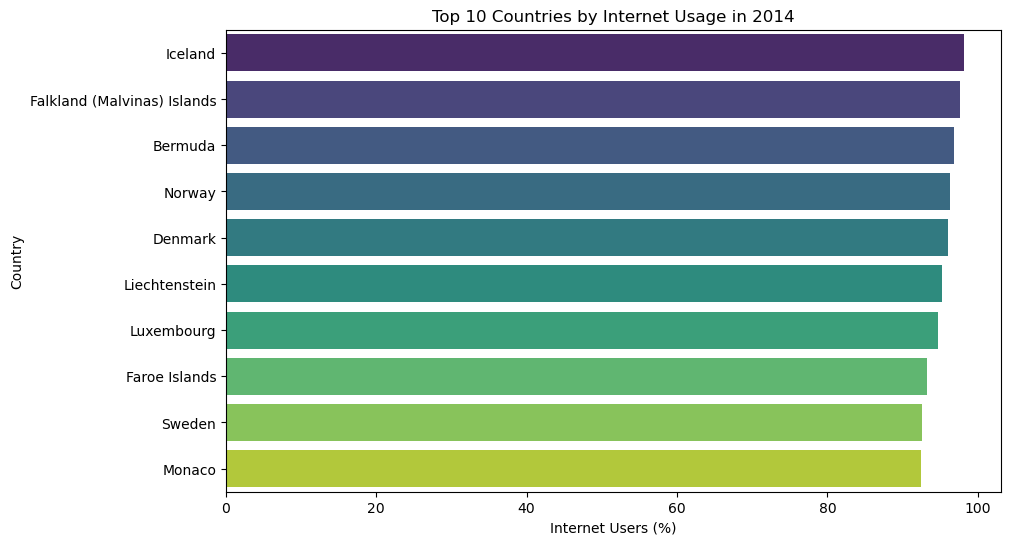

In [73]:
# for my own curiosity, I am making a chart that shows the top 10 countries for internet usage in 2014
top10_countries = internet_2014.nlargest(10, "Internet_Users_Pct")
print(top10_countries[["Country", "Internet_Users_Pct"]])

plt.figure(figsize=(10,6))
sns.barplot(
    data=top10_countries,
    x="Internet_Users_Pct",
    y="Country",
    hue="Country", 
    palette="viridis",
    legend=False) 

plt.title("Top 10 Countries by Internet Usage in 2014")
plt.xlabel("Internet Users (%)")
plt.ylabel("Country")
plt.show()

In [74]:
# 22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use["Year"] == 2014]

# Inspect the result
print(gdp_and_internet_use_2014.head())
print(gdp_and_internet_use_2014.info())

                         Country  Year  GDP_Per_Capita  Internet_Users_Pct
15                   Afghanistan  2014     3017.942544                 7.0
49   Africa Eastern and Southern  2014     4052.851526                 NaN
83    Africa Western and Central  2014     4816.917355                 NaN
117                      Albania  2014    12788.747231                54.3
151                      Algeria  2014    15073.762940                29.5
<class 'pandas.core.frame.DataFrame'>
Index: 285 entries, 15 to 9489
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             285 non-null    object 
 1   Year                285 non-null    Int64  
 2   GDP_Per_Capita      247 non-null    float64
 3   Internet_Users_Pct  204 non-null    float64
dtypes: Int64(1), float64(2), object(1)
memory usage: 11.4+ KB
None


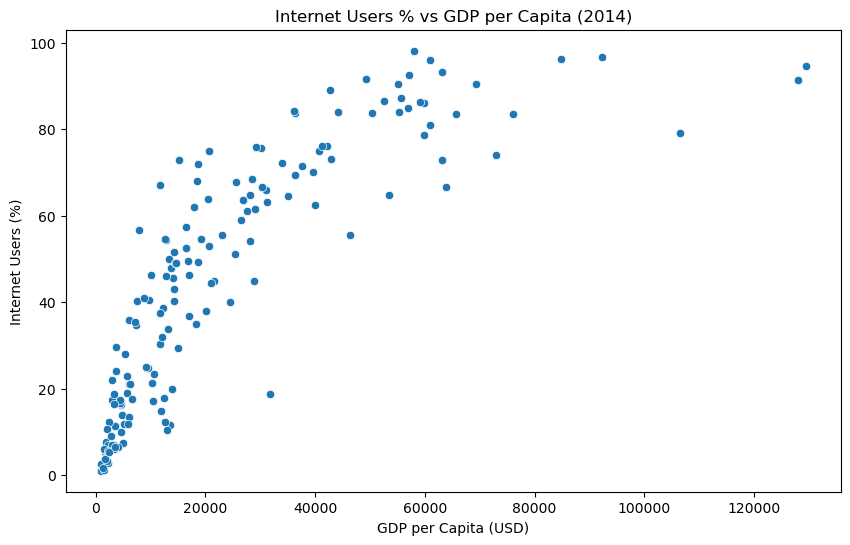

In [75]:
# 23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you
# notice from this plot? If you see any unusual points, investigate them.

# Scatterplot: Internet Users % vs GDP per Capita (2014)
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=gdp_and_internet_use_2014,
    x="GDP_Per_Capita",
    y="Internet_Users_Pct"
)

plt.title("Internet Users % vs GDP per Capita (2014)")
plt.xlabel("GDP per Capita (USD)")
plt.ylabel("Internet Users (%)")
plt.show()

In [76]:
gdp_and_internet_use_2014.sort_values("Internet_Users_Pct", ascending=False).head(10)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3944,Iceland,2014,57981.199448,98.1580
2867,Falkland (Malvinas) Islands,2014,NaN,97.6000
824,Bermuda,2014,92298.387811,96.8000
6467,Norway,2014,84753.668395,96.3005
2168,Denmark,2014,60992.212220,95.9935
5032,Liechtenstein,2014,NaN,95.2100
5200,Luxembourg,2014,129443.183641,94.6702
2890,Faroe Islands,2014,63151.504427,93.3000
8309,Sweden,2014,57033.845962,92.5236
5818,Monaco,2014,NaN,92.4000


In [77]:
gdp_and_internet_use_2014[gdp_and_internet_use_2014["Internet_Users_Pct"] < 20]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
15,Afghanistan,2014,3017.942544,7.00000
620,Bangladesh,2014,5068.639657,11.90000
790,Benin,2014,2987.382363,6.00000
1161,Burkina Faso,2014,2083.198447,6.00000
1195,Burundi,2014,977.765840,1.04239
1263,Cambodia,2014,4702.730618,14.00000
1297,Cameroon,2014,4588.486495,16.21490
1422,Central African Republic,2014,1001.855981,2.70000
1490,Chad,2014,2223.713834,2.90000
1689,Comoros,2014,3397.092588,6.98000


Countries with a higher GDP rating also have a higher internet user pct, while lower GDP countries have a lower internet user pct.

In [94]:
# 24. **Stretch Question:** Use the `qcut` function from pandas 
# (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014`
# into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". 
# Put these labels in a new column, named "GDP_group".

# Make sure you subset the GDP dataset to 2014 and copy it
gdp_per_capita_2014 = gdp_df_clean[gdp_df_clean["Year"] == 2014].copy()

# Divide countries into 3 groups based on GDP per capita
gdp_per_capita_2014['GDP_group'] = pd.qcut(
    gdp_per_capita_2014['GDP_Per_Capita'],
    q=3,
    labels=["Low", "Medium", "High"]
)

# Inspect the result
print(gdp_per_capita_2014[['Country', 'GDP_Per_Capita', 'GDP_group']].head(10))


                         Country  GDP_Per_Capita GDP_group
9                    Afghanistan     3017.942544       Low
33   Africa Eastern and Southern     4052.851526       Low
67    Africa Western and Central     4816.917355       Low
101                      Albania    12788.747231    Medium
135                      Algeria    15073.762940    Medium
169                      Andorra    59929.244467      High
203                       Angola    10250.592404    Medium
237          Antigua and Barbuda    25565.965684      High
271                   Arab World    15652.603641    Medium
305                    Argentina    28200.815257      High


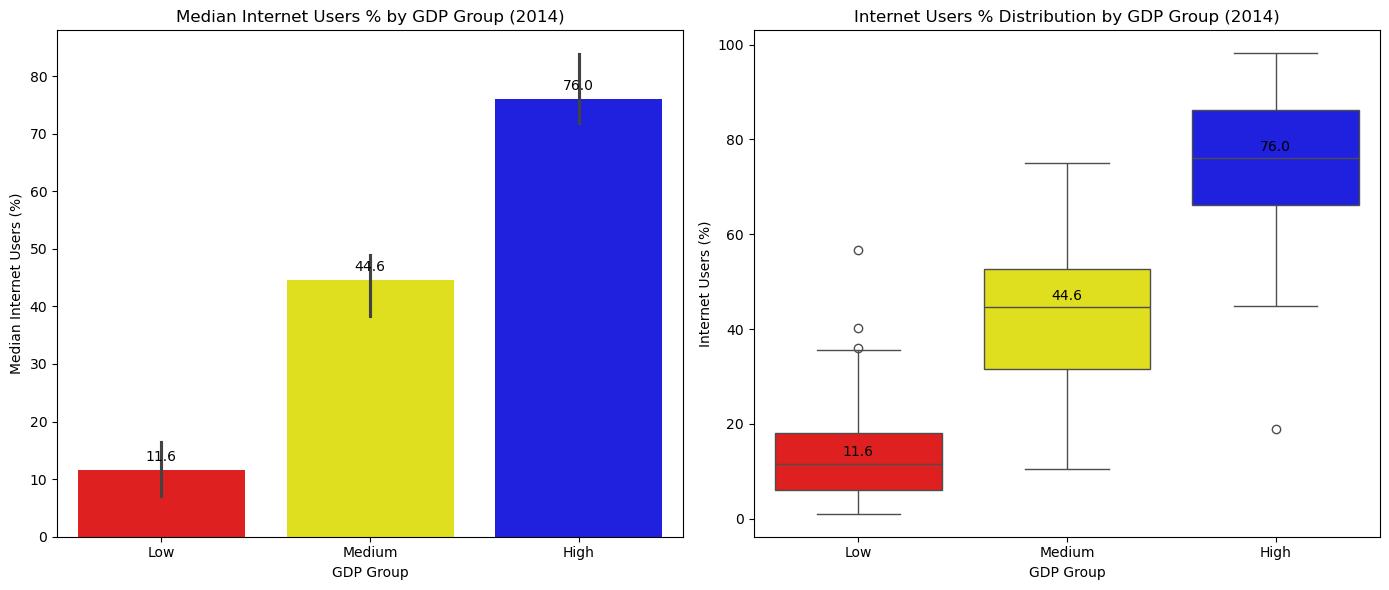

In [89]:
# 25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

# Merge GDP groups from Step 24 into the internet usage dataset
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use["Year"] == 2014].copy()
gdp_and_internet_use_2014 = gdp_and_internet_use_2014.merge(
    gdp_per_capita_2014[["Country", "GDP_group"]],
    on="Country",
    how="left"
)

# Calculate median internet usage per GDP group
median_usage = gdp_and_internet_use_2014.groupby("GDP_group", observed=True)["Internet_Users_Pct"].median()

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Bar chart with median labels
sns.barplot(
    data=gdp_and_internet_use_2014,
    x="GDP_group",
    y="Internet_Users_Pct",
    hue="GDP_group",
    palette={"Low":"red", "Medium":"yellow", "High":"blue"},
    estimator="median",
    legend=False,
    ax=axes[0]
)
for i, val in enumerate(median_usage.values):
    axes[0].text(i, val + 1, round(val, 1), ha='center', va='bottom', fontsize=10, color='black')
axes[0].set_title("Median Internet Users % by GDP Group (2014)")
axes[0].set_xlabel("GDP Group")
axes[0].set_ylabel("Median Internet Users (%)")

# Boxplot with median labels
sns.boxplot(
    data=gdp_and_internet_use_2014,
    x="GDP_group",
    y="Internet_Users_Pct",
    hue="GDP_group",
    palette={"Low":"red", "Medium":"yellow", "High":"blue"},
    legend=False,
    ax=axes[1]
)
for i, val in enumerate(median_usage.values):
    axes[1].text(i, val + 1, round(val, 1), ha='center', va='bottom', fontsize=10, color='black')
axes[1].set_title("Internet Users % Distribution by GDP Group (2014)")
axes[1].set_xlabel("GDP Group")
axes[1].set_ylabel("Internet Users (%)")

plt.tight_layout()
plt.show()


In [ ]:
## A Guided Exploration of UN Data (Gross Domestic Product and Internet Usage)

# 1. Take a look at the two CSV's in the data folder. 
#    a. **You never want to open a CSV in excel that you plan to use in python. When opened, a CSV can have formatting changes introduced by Excel** 
#    b. Instead, make a copy of each, and paste it somewhere else. Then, open the files that you copied in Excel to inspect. Be sure to only open the copies.
# 2.	Create a folder in your repo named 'notebooks'.This is where you will save all of your jupyter notebooks for python.  
# - **IMPORTANT:**  You are likely to get errors along the way. When you do, read the errors to try to understand what is happening and how to correct it.
#  - Use markdown cells to record your answers to any questions asked in this exercise. On the menu bar, you can toggle the cell type from `Code` to `Markdown`.
# 3.	Import the required packages with their customary aliases as follows:
#    `import pandas as pd`   
#    `import numpy as np`  
#     `import matplotlib.pyplot as plt`  
#     `import seaborn as sns`
# 4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.
# 5. How many rows and columns are in `gdp_df`? What are the data types of each column?
# 6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.
# 7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 
# 8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?
# 9. What was the median GDP per capita value in 2020?
# 10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
# 	* A boxplot
# 	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
# 	* A scatterplot
# 	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
# Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.
# 11. Which country was the first to have a GDP per capita greater than $100,000?
# 12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.
# 13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?
# 14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.
# 15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.
# 16. Look at the number of observations in this dataset per year. What do you notice?
# 17. What is the first year to have a non-zero internet users percentage value?
# 18. How does the distribution of internet users percent differ for 2000 and 2014?
# 19. For how many countries was the percentage of internet users below 5% in 2014
# 20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.
# 21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?
# 22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.
# 23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.
# 24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".
# 25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

### Bonus exercise:
# 1.    Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.
